The Enhanced Natural Terrain Landslide Inventory(ENTLI is a historical record of more than 100 000 observations and 14 features that has data from 1924 to 2019 of aerial photographs taken of hillsides and slopes. It includes locations of indentified landslides in latitudes and longitudes as well as other associated data for each landslide.
   - `slide_type:` classification of landslide
   - `m_width:` width of landslide main scarp(metres)
   - `s_length:` length of landslide source area(metres)
   - `slope:` ground slope angle across the landslide head
   - `cover:` vegetation cover within the landslide source
   - `year_1:` year of the aerial photograph on which the landside first observed.
   - `headelev:` elevation of landslide crown in mPD
   - `tailelev:` elevation of landslide toe in mPD.
   - `ele_diff:` elevation difference between landslide crown and toe in metre.
   - `gully:` "Y" when landslide is within a previously recorded area of gully erosion and "N" for when landslide is located outside of such areas
   - `class:` classification of relict landslide
   - `ENTLI_NO:` ENTLI number
   - `northing:` latitude coordinates
   - `easting:` longitude coordinates

## Preliminary Wrangling

In [1]:
#import all packages
import geopandas as gpd
import fiona

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
print(gpd.__version__)
dir(gpd)

0.6.1


['GeoDataFrame',
 'GeoSeries',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_config',
 '_version',
 'array',
 'base',
 'datasets',
 'geodataframe',
 'geopandas',
 'geoseries',
 'gpd',
 'io',
 'np',
 'options',
 'overlay',
 'pd',
 'plotting',
 'points_from_xy',
 'read_file',
 'read_postgis',
 'show_versions',
 'sjoin',
 'tools']

In [3]:
# read the file into a geodataframe
landslide_data = gpd.read_file('a0000000a.gdbtable', encoding='utf-8')

In [4]:
#check original projection
print(landslide_data['geometry'].crs is None)
j = landslide_data['geometry'].crs
j

False


{'init': 'epsg:2326'}

The crs is a Mercator projection

In [5]:
landslide_data.head()

,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,COVER,YEAR_1,HEADELEV,TAILELEV,ELE_DIFF,GULLY,CLASS,ENTLI_NO,EASTING,NORTHING,Shape_Length,geometry
0,R,10.5,16.0,44.0,C,1964,136.0,127.0,9.0,N,A2,02NED0001E,829062.359007,842154.704576,16.246627,"MULTILINESTRING ((829062.359 842154.705, 82904..."
1,R,11.5,14.0,29.0,C,1964,122.0,113.0,9.0,N,C1,02NED0002E,829176.865680,842509.807641,13.765049,"MULTILINESTRING ((829176.866 842509.808, 82917..."
2,R,10.0,16.0,22.0,C,1964,48.0,39.0,9.0,N,A2,02NED0003E,827401.227700,842230.475928,16.192822,"MULTILINESTRING ((827401.228 842230.476, 82738..."
3,R,11.0,22.5,22.0,C,1964,53.0,42.0,11.0,N,C1,02NED0004E,827407.309973,842208.930039,22.423121,"MULTILINESTRING ((827407.310 842208.930, 82738..."
4,R,12.5,14.0,43.0,C,1964,97.0,87.0,10.0,N,B1,02NED0005E,827526.113452,842190.282812,13.861750,"MULTILINESTRING ((827526.113 842190.283, 82753..."


In [6]:
#geometry types in the dataset
landslide_data.geom_type.unique()

array(['MultiLineString'], dtype=object)

The geometry entries are made up of multiline strings

__Convert Mercator projection to the strandard coordinate system for earth - EPSG 4326__

In [7]:
#convert from 2326 to 4326, CONVERT EASTING,NORTHING coordinates to lat,long coordinates
geometry_4326 = landslide_data.to_crs(epsg = 4326)

In [33]:
#print(geometry_4326['geometry'].iloc[0])
geometry_4326['geometry'] = geometry_4326['geometry'].centroid

In [ ]:
geometry_4326.get

In [34]:
geometry_4326.head()

,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,COVER,YEAR_1,HEADELEV,TAILELEV,ELE_DIFF,GULLY,CLASS,ENTLI_NO,EASTING,NORTHING,Shape_Length,geometry
0,R,10.5,16.0,44.0,C,1964,136.0,127.0,9.0,N,A2,02NED0001E,829062.359007,842154.704576,16.246627,POINT (114.10676 22.51906)
1,R,11.5,14.0,29.0,C,1964,122.0,113.0,9.0,N,C1,02NED0002E,829176.865680,842509.807641,13.765049,POINT (114.10796 22.52220)
2,R,10.0,16.0,22.0,C,1964,48.0,39.0,9.0,N,A2,02NED0003E,827401.227700,842230.475928,16.192822,POINT (114.09061 22.51972)
3,R,11.0,22.5,22.0,C,1964,53.0,42.0,11.0,N,C1,02NED0004E,827407.309973,842208.930039,22.423121,POINT (114.09064 22.51952)
4,R,12.5,14.0,43.0,C,1964,97.0,87.0,10.0,N,B1,02NED0005E,827526.113452,842190.282812,13.861750,POINT (114.09197 22.51939)


In [35]:
#convert file to csv to use in PowerBi or Google Studio
geometry_4326.to_csv('landslide_2.csv', index = False)

In [38]:
geometry_4326.to_file('landslide2.geojson', driver="GeoJSON")

In [11]:
# dataset information
landslide_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 111569 entries, 0 to 111568
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   SLIDE_TYPE    111569 non-null  object  
 1   M_WIDTH       111569 non-null  float64 
 2   S_LENGTH      111569 non-null  float64 
 3   SLOPE         111569 non-null  float64 
 4   COVER         111569 non-null  object  
 5   YEAR_1        111569 non-null  object  
 6   HEADELEV      111569 non-null  float64 
 7   TAILELEV      111569 non-null  float64 
 8   ELE_DIFF      111569 non-null  float64 
 9   GULLY         111569 non-null  object  
 10  CLASS         111569 non-null  object  
 11  ENTLI_NO      111569 non-null  object  
 12  EASTING       111569 non-null  float64 
 13  NORTHING      111569 non-null  float64 
 14  Shape_Length  111569 non-null  float64 
 15  geometry      111569 non-null  geometry
dtypes: float64(9), geometry(1), object(6)
memory usage: 13.6+ MB


In [12]:
landslide_data.isnull().sum()

SLIDE_TYPE      0
M_WIDTH         0
S_LENGTH        0
SLOPE           0
COVER           0
YEAR_1          0
HEADELEV        0
TAILELEV        0
ELE_DIFF        0
GULLY           0
CLASS           0
ENTLI_NO        0
EASTING         0
NORTHING        0
Shape_Length    0
geometry        0
dtype: int64

#### Missing values
- There are missing values stored as '-'or 9999. These are landslide crowns or trails that are in subsequent development.

In [13]:
landslide_data.nunique()

SLIDE_TYPE           4
M_WIDTH            161
S_LENGTH           231
SLOPE              258
COVER                5
YEAR_1              62
HEADELEV           996
TAILELEV           981
ELE_DIFF           388
GULLY                3
CLASS                8
ENTLI_NO        111567
EASTING         109657
NORTHING        108921
Shape_Length     75607
geometry        111557
dtype: int64

In [14]:
landslide_data.duplicated().sum()

0

In [15]:
landslide_data.CLASS.unique()

array(['A2', 'C1', 'B1', 'C2', 'B2', '-', 'A1', 'S'], dtype=object)

###### Landslide classification
__scarp meaning: (escarpment): a very steep slope__
- A1: Debris relating to source evident (80% certain)
- A2: Scarp predominantly sharp (80% certain)
- B1: Scarp predominantly rounded (50% certain)
- B2: Rock scarp beyond which scarp predominantly rounded (50% certain)
- C1: Depression related to drainage line (10% certain)
- C2: road depression (10% certain)
- S: Coastal landslid

In [16]:
landslide_data.SLIDE_TYPE.unique()

array(['R', 'C', 'O', 'S'], dtype=object)

- R: relict landslide
- C: recent channelized debris flow
- O: recent open hillslope landslide
- S: recent coastal landslide

In [17]:
landslide_data.COVER.unique()

array(['C', 'A', 'B', 'D', ' B'], dtype=object)

- A: Totally bare of vegetation
- B: Partially bare of vegetation
- C: Completely covered by grass
- D: Covered in shrubs and/or trees

In [18]:
landslide_data.GULLY.unique()

array(['N', 'Y', ' N'], dtype=object)

__Area of gully have an invalid value__
- N prefixed with a space

__Is the data tidy?__
- The column names are in upper case. TO DO: Convert headings to lower case

In [ ]:
landslide_geojson = landslide_data

In [19]:
#landslide_df = pd.read_csv('landslide_loc.csv')
#landslide_df.head()

In [20]:
#REMOVE

In [21]:
#landslide_df.drop('geometry', axis = 1, inplace = True)

In [22]:
#landslide_df.info()

In [23]:
#landslide_df['city'] = 'HK'

In [24]:
#geometry_4326.to_csv('landslide_loc.csv', index = False)

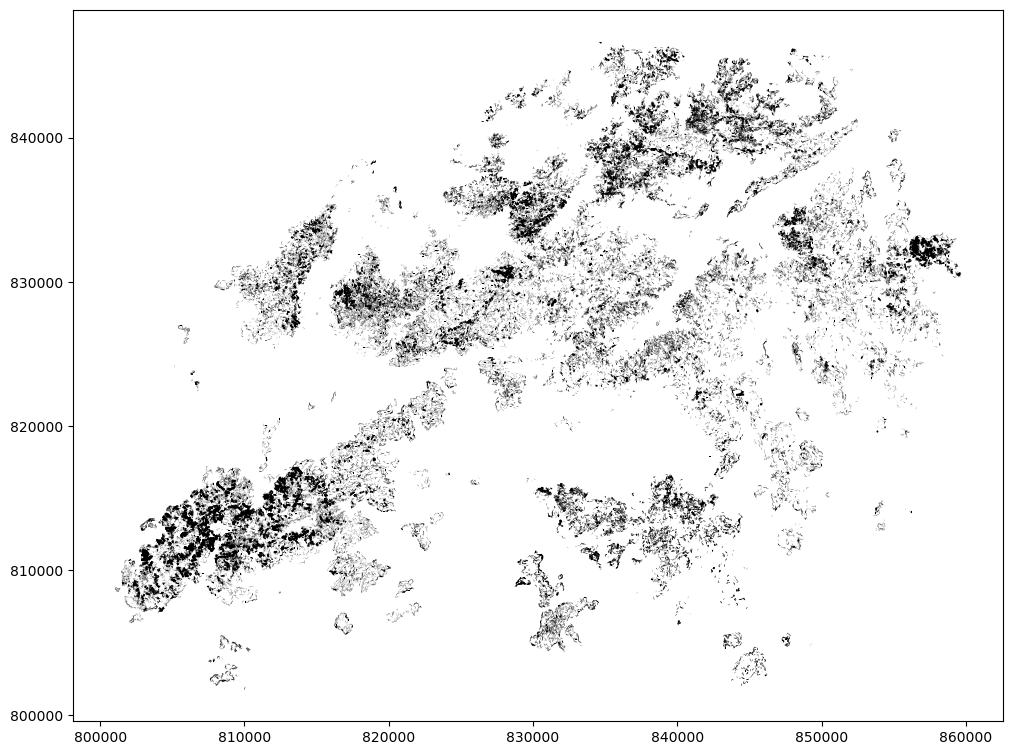

In [25]:
#density of landslides
landslide_data.plot(figsize=[12, 10], color='black', edgecolor = 'black')

plt.show()

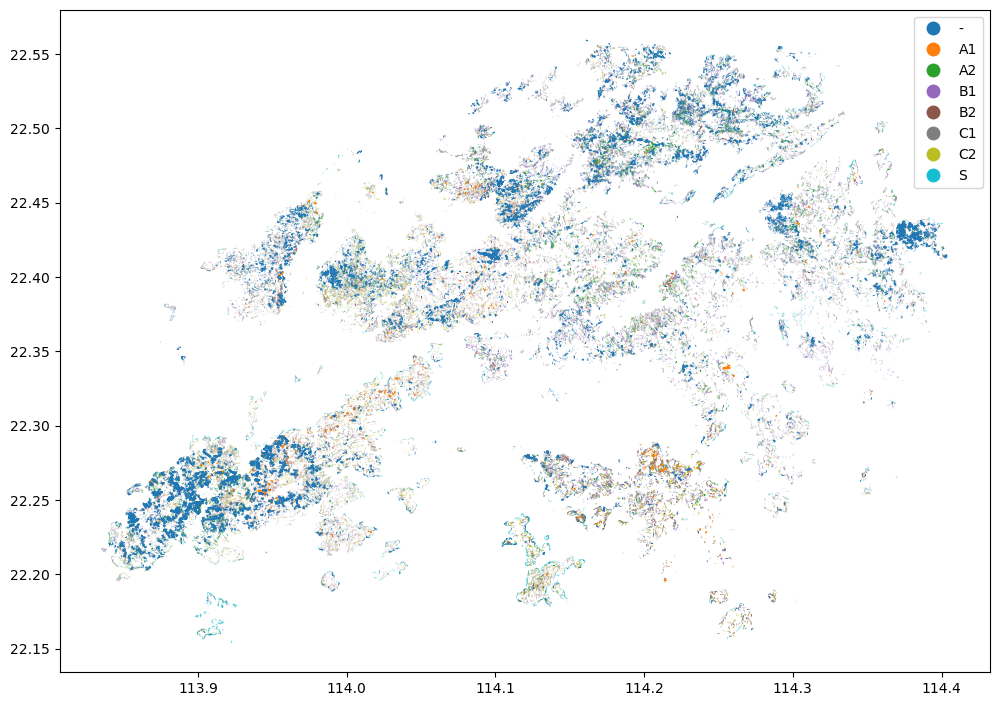

In [26]:
#density of landslides
geometry_4326.plot('CLASS', figsize=[12, 10], legend = True)

plt.show()

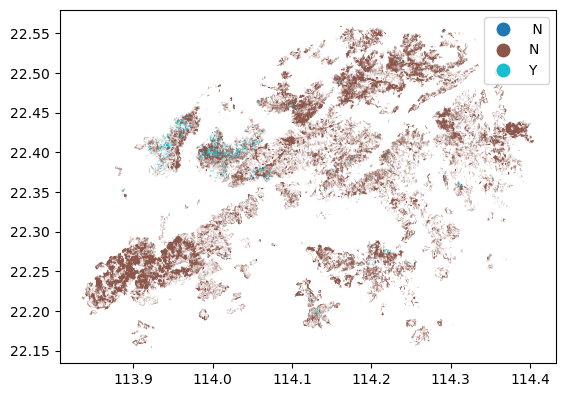

In [27]:
#density of landslides
geometry_4326.plot('GULLY', legend = True)

plt.show()

## Exploratory Data Analysis

In [28]:
landslide_data.describe()

,M_WIDTH,S_LENGTH,SLOPE,HEADELEV,TAILELEV,ELE_DIFF,EASTING,NORTHING,Shape_Length
count,111569.000000,111569.000000,111569.000000,111569.000000,111569.000000,111569.000000,111569.000000,111569.000000,111569.000000
mean,11.586908,9.819254,411.931924,567.640296,562.730317,422.518669,829310.267275,826023.771493,16.740563
std,5.939114,5.500198,1894.058356,1866.056524,1881.235199,1985.505001,15012.863206,10848.474032,31.419866
min,0.500000,0.700000,0.000000,1.000000,0.000000,0.500000,801050.657471,801788.942094,0.416577
25%,8.000000,7.000000,32.500000,94.000000,84.000000,6.000000,816004.343724,814721.996087,7.745577
50%,10.000000,9.000000,38.500000,184.000000,172.000000,7.000000,830860.993976,828322.168918,9.999497
75%,14.000000,11.500000,45.000000,299.000000,287.000000,11.000000,841311.981717,834556.708612,14.042899
max,180.000000,139.500000,9999.000000,9999.000000,9999.000000,9999.000000,859623.377966,846548.849768,1758.132593


__Frequency of slide_types__

<AxesSubplot:>

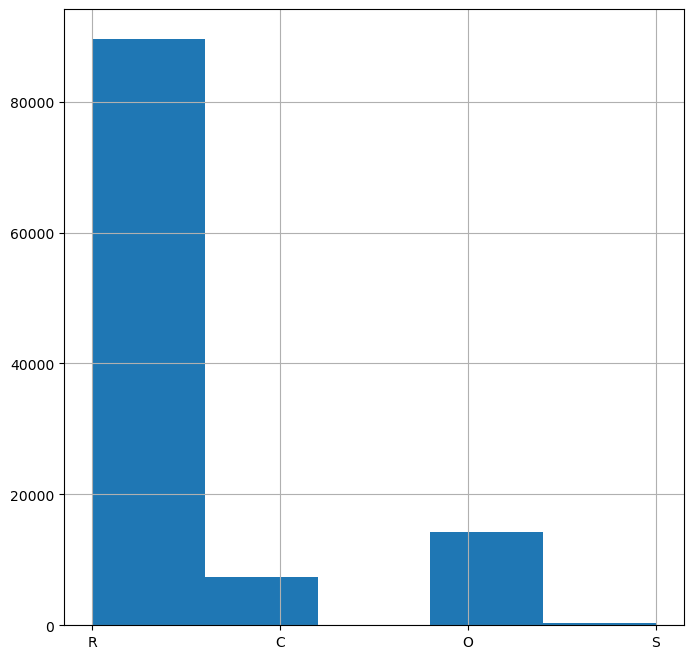

In [29]:
landslide_data.SLIDE_TYPE.hist(figsize=[8,8], bins = 5)

__Frequency of class types__
Class is categorical nominal and its frequencies is represented with a histogram

<AxesSubplot:>

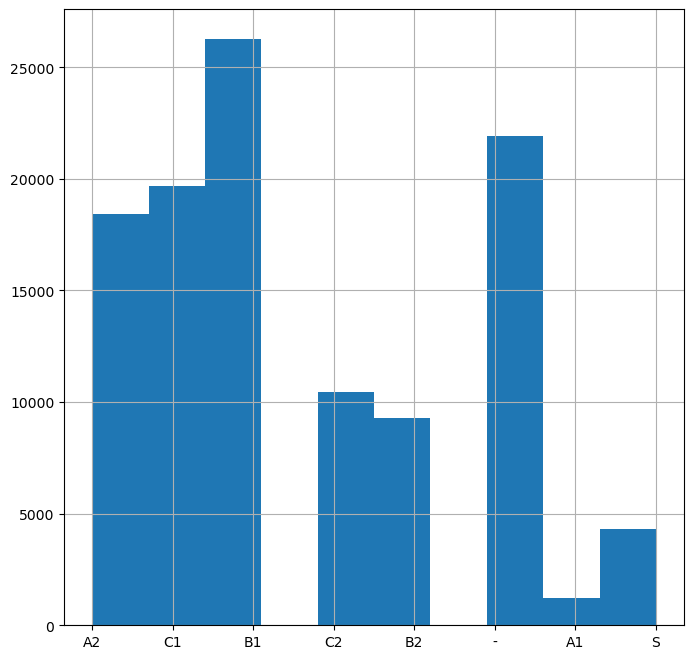

In [30]:
landslide_data.CLASS.hist(figsize=[8,8], bins = 10)

- There is a high frequency of B1 type - Scarp predominantly rounded (50% certain)
- Then followed by  type C1 - Depression related to drainage line (10% certain)

In [31]:
#landslide_data.query('CLASS == "-"')
landslide_data.query('YEAR_1 == "2017"')

,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,COVER,YEAR_1,HEADELEV,TAILELEV,ELE_DIFF,GULLY,CLASS,ENTLI_NO,EASTING,NORTHING,Shape_Length,geometry
110823,O,7.0,7.0,29.0,A,2017,283.0,264.0,19.0,N,-,03NWD0545E,837450.371401,844895.135803,30.452245,"MULTILINESTRING ((837450.371 844895.136, 83744..."
111012,C,8.0,5.5,38.0,A,2017,37.0,11.0,26.0,N,-,04SWA1511E,846503.644235,841944.412543,43.083998,"MULTILINESTRING ((846503.644 841944.413, 84649..."
111054,O,4.0,3.0,37.0,A,2017,197.0,193.0,4.0,N,-,05SEB1258E,812218.793548,828496.500052,4.974507,"MULTILINESTRING ((812218.794 828496.500, 81221..."
111055,O,5.5,4.5,48.0,A,2017,164.0,158.0,6.0,Y,-,05SEB1259E,811922.078348,829347.018365,7.545512,"MULTILINESTRING ((811922.078 829347.018, 81191..."
111057,O,11.0,4.5,37.0,A,2017,190.0,186.0,4.0,N,-,05SED0173E,811852.642146,826730.581596,6.707826,"MULTILINESTRING ((811852.642 826730.582, 81185..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111564,O,5.7,10.5,38.0,A,2017,83.0,75.0,8.0,N,-,10NWD0666E,820663.549595,819824.331668,10.525816,"MULTILINESTRING ((820663.550 819824.332, 82067..."
111565,O,5.6,15.7,59.0,A,2017,78.0,51.0,27.0,N,-,10NWD0667E,820520.705678,820492.189541,36.807200,"MULTILINESTRING ((820520.706 820492.190, 82050..."
111566,O,4.8,10.5,34.6,A,2017,31.0,0.0,31.0,N,-,10NWD0668E,821779.340312,819311.418652,30.491831,"MULTILINESTRING ((821779.340 819311.419, 82179..."
111567,O,3.2,12.7,45.0,A,2017,57.0,30.0,27.0,N,-,10NWD0669E,821608.877749,819929.019123,50.729366,"MULTILINESTRING ((821608.878 819929.019, 82162..."


In [32]:
#combine latitude and logitudes
landslide_data['position'] = landslide_data.

SyntaxError: invalid syntax (1657006809.py, line 2)

In [ ]:
import numpy as np